# Table contant:
    1. Requred Libraries
    2. Load and preprocess the MNIST dataset
    3. EDA
    4. Create Models and Find best model for the Dataset
        4.1 Create the CNN model
        4.2 Evaluate the CNN model
        4.3 Create DenseNet Model
        4.4 Evaluate the DenseNet model
        4.5 Create VGG Model
        4.6 Evaluate the VGG model
    5. Choising best model and save it
        5.1 save the best (CNN) model
        
     
> **I hope, you will injoy this Notebook**

# Requred Libraries

In [ ]:
# install Tensorflow
!pip install tensorflow


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, GlobalAveragePooling2D, \
                                    BatchNormalization, Input
from tensorflow.keras.applications import DenseNet121, VGG16
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the MNIST dataset

In [20]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## EDA

In [21]:
# Display basic information about the dataset
print("Number of training samples:", len(x_train))
print("Number of testing samples:", len(x_test))
print("Image shape:", x_train[0].shape)
print("Unique labels:", np.unique(y_train))

Number of training samples: 60000
Number of testing samples: 10000
Image shape: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


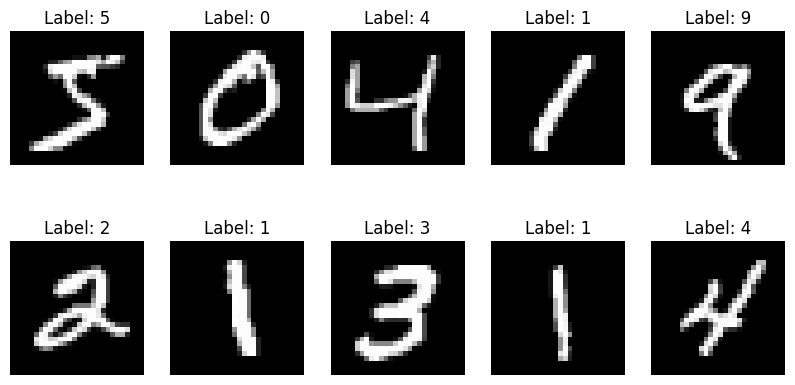

In [22]:
# Visualize a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

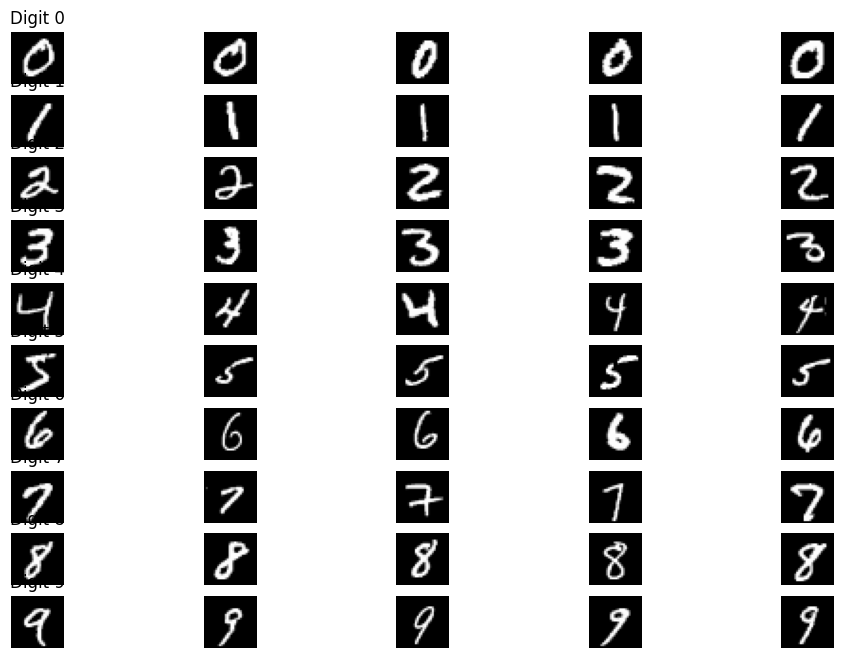

In [23]:
# Display a few images for each digit
plt.figure(figsize=(12, 8))
for digit in range(10):
    indices = np.where(y_train == digit)[0]
    for i in range(5):
        plt.subplot(10, 5, digit * 5 + i + 1)
        plt.imshow(x_train[indices[i]], cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(f'Digit {digit}')
plt.show()

In [51]:
# Normalization
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# Resizing the images to 32x32
x_train_resized = tf.image.resize(x_train, [32, 32])
x_test_resized = tf.image.resize(x_test, [32, 32])


# Create Models and Find best model for the Dataset

## 1. Create the CNN model

In [34]:

CNN_model = Sequential()
CNN_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(MaxPooling2D((2, 2)))
CNN_model.add(Conv2D(64, (3, 3), activation='relu'))
CNN_model.add(Flatten())
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dense(10, activation='softmax'))

# Compile the model
CNN_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
hist_CNN_model = CNN_model.fit(x_train_resized, y_train, epochs=5, batch_size=32, validation_split=0.2,)

Epoch 1/5
1500/1500 [==============================] - 36s 23ms/step - loss: 0.1573 - accuracy: 0.9506 - val_loss: 0.0511 - val_accuracy: 0.9843
Epoch 2/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0481 - accuracy: 0.9849 - val_loss: 0.0464 - val_accuracy: 0.9847
Epoch 3/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0348 - accuracy: 0.9890 - val_loss: 0.0487 - val_accuracy: 0.9864
Epoch 4/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0274 - accuracy: 0.9914 - val_loss: 0.0424 - val_accuracy: 0.9865
Epoch 5/5
1500/1500 [==============================] - 35s 23ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0397 - val_accuracy: 0.9893


# Evaluate the CNN model

In [35]:
test_loss, test_accuracy = CNN_model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')

313/313 [==============================] - 2s 7ms/step - loss: 0.0394 - accuracy: 0.9893
Test accuracy: 0.989300012588501, Test loss: 0.03943882882595062


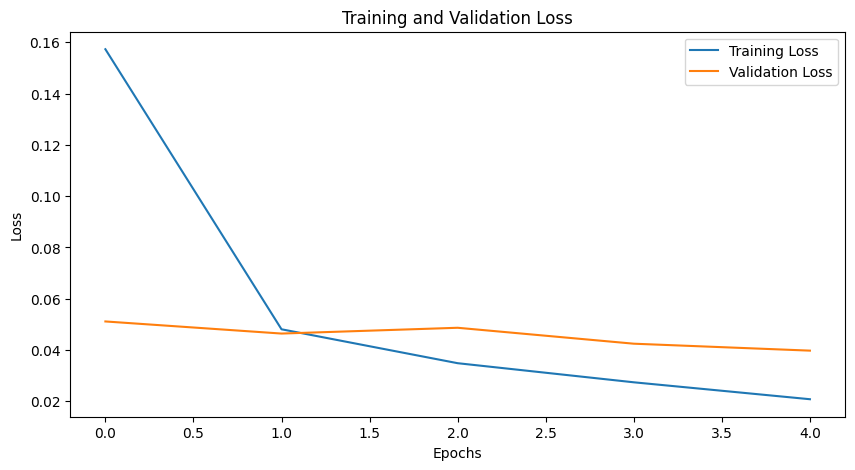

In [36]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(hist_CNN_model.history['loss'], label='Training Loss')
plt.plot(hist_CNN_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

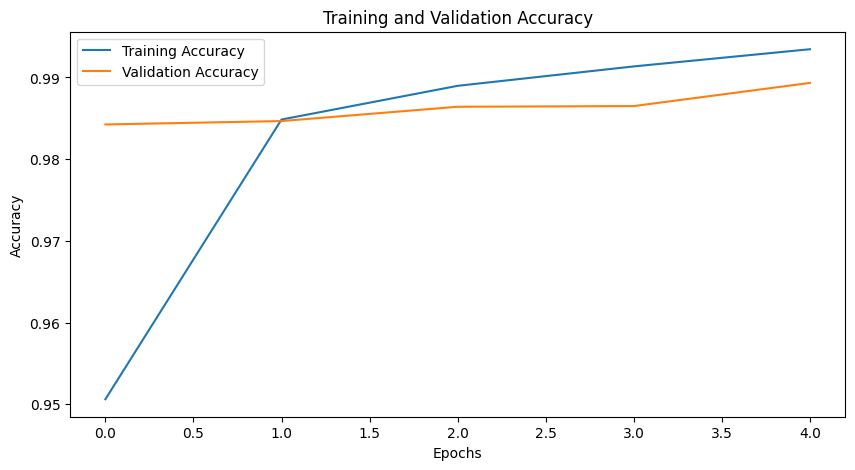

In [37]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(hist_CNN_model.history['accuracy'], label='Training Accuracy')
plt.plot(hist_CNN_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 2. Create DenseNet Model

In [38]:
# Resizing the images to 32x32
x_train_resized = tf.image.resize(x_train, [32, 32])
x_test_resized = tf.image.resize(x_test, [32, 32])

# Create a custom DenseNet-like model
input_layer = Input(shape=(32, 32, 1))
x = Conv2D(3, (3, 3), activation='relu')(input_layer)
x = BatchNormalization()(x)

# Resize to 3 channels and adjust the size for DenseNet input
x = resize(x, [36, 36])

# Load DenseNet121 with ImageNet weights
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(36, 36, 3))
x = base_model(x)

x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

densenet_model = Model(inputs=input_layer, outputs=output)

# Compile the model
densenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_densenet_model = densenet_model.fit(x_train_resized, y_train, epochs=5, batch_size=32, validation_split=0.2,)



29084464/29084464 [==============================] - 0s 0us/step
Epoch 1/5
1500/1500 [==============================] - 668s 420ms/step - loss: 0.1570 - accuracy: 0.9571 - val_loss: 0.0629 - val_accuracy: 0.9838
Epoch 2/5
1500/1500 [==============================] - 634s 423ms/step - loss: 0.0676 - accuracy: 0.9816 - val_loss: 0.0408 - val_accuracy: 0.9892
Epoch 3/5
1500/1500 [==============================] - 635s 423ms/step - loss: 0.0684 - accuracy: 0.9830 - val_loss: 0.0774 - val_accuracy: 0.9803
Epoch 4/5
1500/1500 [==============================] - 632s 422ms/step - loss: 0.0435 - accuracy: 0.9881 - val_loss: 0.0413 - val_accuracy: 0.9877
Epoch 5/5
1500/1500 [==============================] - 634s 423ms/step - loss: 0.0387 - accuracy: 0.9885 - val_loss: 0.0451 - val_accuracy: 0.9879


# Evaluate the DenseNet model

In [39]:
test_loss, test_accuracy = densenet_model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')

313/313 [==============================] - 28s 80ms/step - loss: 0.0358 - accuracy: 0.9892
Test accuracy: 0.9891999959945679, Test loss: 0.035791944712400436


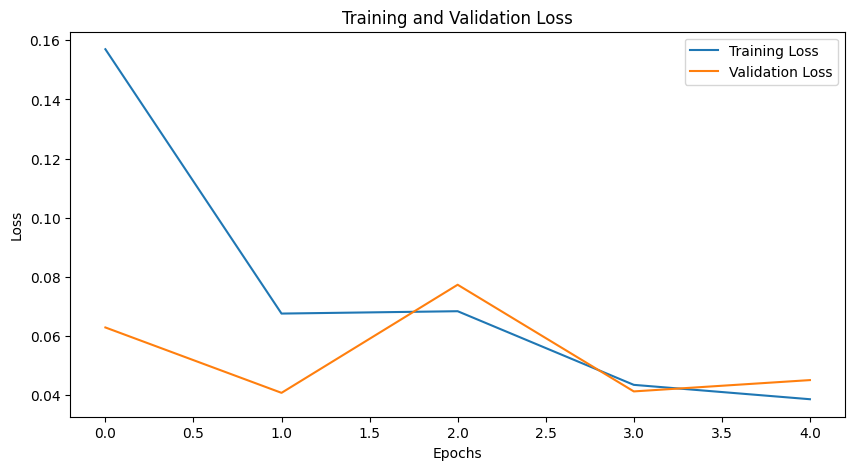

In [40]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(hist_densenet_model.history['loss'], label='Training Loss')
plt.plot(hist_densenet_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

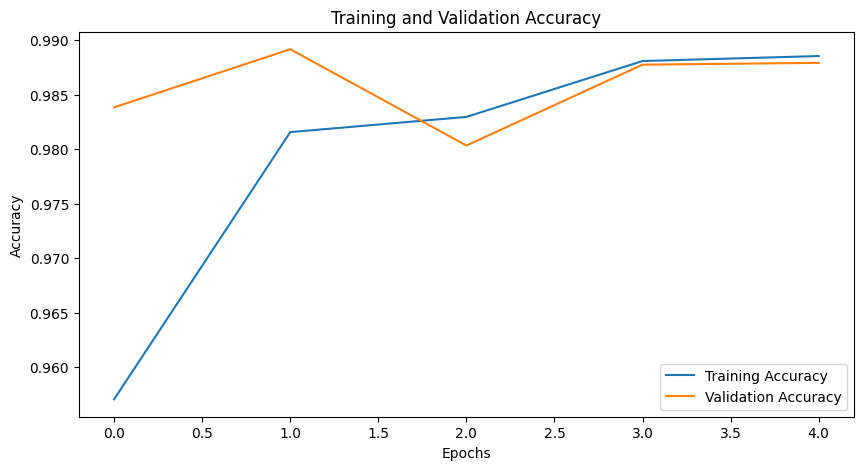

In [41]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(hist_densenet_model.history['accuracy'], label='Training Accuracy')
plt.plot(hist_densenet_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3. Create VGG Model

In [42]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_resized = tf.image.resize(x_train.reshape((-1, 28, 28, 1)), [32, 32])
x_test_resized = tf.image.resize(x_test.reshape((-1, 28, 28, 1)), [32, 32])
x_train_resized = tf.image.grayscale_to_rgb(x_train_resized)  # Convert to 3 channels for VGG16
x_test_resized = tf.image.grayscale_to_rgb(x_test_resized)
x_train_resized = x_train_resized / 255.0
x_test_resized = x_test_resized / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Load VGG16 model without the top classification layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Create a new model on top
VGG_model = Sequential()
VGG_model.add(base_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(128, activation='relu'))
VGG_model.add(Dense(10, activation='softmax'))

# Compile the model
VGG_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
hist_VGG_model = VGG_model.fit(x_train_resized, y_train, epochs=5, batch_size=32, validation_split=0.2)

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/5
1500/1500 [==============================] - 2290s 2s/step - loss: 0.4353 - accuracy: 0.8544 - val_loss: 0.1085 - val_accuracy: 0.9752
Epoch 2/5
1500/1500 [==============================] - 2308s 2s/step - loss: 0.1443 - accuracy: 0.9655 - val_loss: 0.1128 - val_accuracy: 0.9703
Epoch 3/5
1500/1500 [==============================] - 2293s 2s/step - loss: 0.1058 - accuracy: 0.9771 - val_loss: 0.1471 - val_accuracy: 0.9622
Epoch 4/5
1500/1500 [==============================] - 2297s 2s/step - loss: 0.0640 - accuracy: 0.9852 - val_loss: 0.0663 - val_accuracy: 0.9870
Epoch 5/5
1500/1500 [==============================] - 2291s 2s/step - loss: 0.0916 - accuracy: 0.9795 - val_loss: 0.1217 - val_accuracy: 0.9753


# Evaluate the VGG model

In [47]:
test_loss, test_accuracy = VGG_model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')

313/313 [==============================] - 51s 162ms/step - loss: 0.1079 - accuracy: 0.9766
Test accuracy: 0.9765999913215637, Test loss: 0.10787833482027054


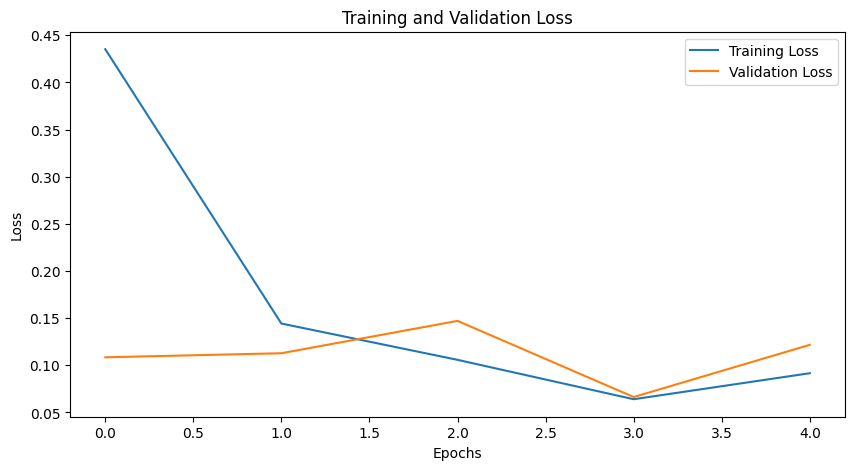

In [48]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(hist_VGG_model.history['loss'], label='Training Loss')
plt.plot(hist_VGG_model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

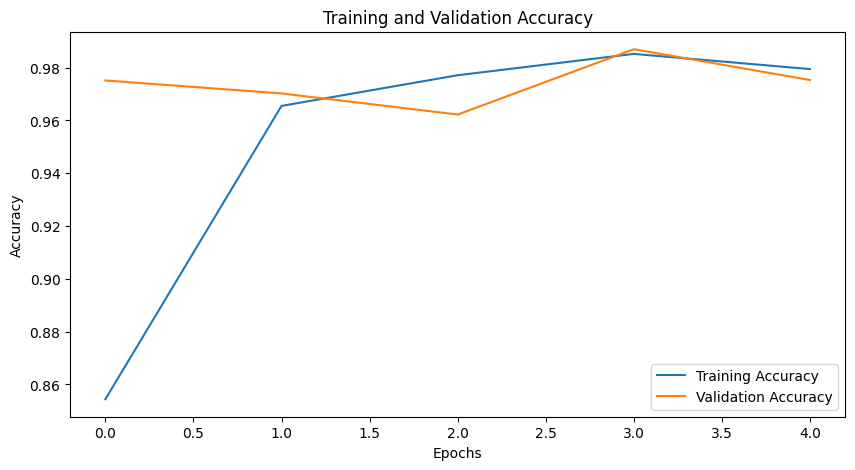

In [49]:
# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(hist_VGG_model.history['accuracy'], label='Training Accuracy')
plt.plot(hist_VGG_model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Choising best model and save it

## we got test accuray and loss following:
  * For CNN Model,     Test accuracy: 0.989300012588501, Test loss: 0.03943882882595062 
  * For DensNet Model, Test accuracy: 0.9891999959945679, Test loss: 0.035791944712400436
  * For VGG Model,     Test accuracy: 0.9765999913215637, Test loss: 0.10787833482027054 
  
 **Since the CNN model is best for the given dataset, because CNN test accuracy is best and accuracy curve and loss curve are granted**

## save the best (CNN) model

In [50]:
CNN_model.save('mnist_model.h5')

#  **Thank You**